# Max Davish: Assignment 3
## Crawling and storing Gallup Daily Data.

#### Part I: Database Script
The first part of this assignment is completed in the attached python script - A3_DatabaseScript. This script takes the scrapes the "Gallup Daily" data from [gallup.com](http://www.gallup.com/home.aspx) and inserts it into an SQL database. This data is updated at 1:00 pm every day, and every day at 2:00 pm the script is run via crontab to record the changes.

#### Part II: Pandas Visualization
With the data added continually to the database, we can use this notebook to aggregate and visualize the data within the database.  

In [28]:
import MySQLdb as mdb
import sys

con = mdb.connect(host = 'localhost', 
                  user = 'root', 
                  passwd = 'dwdstudent2015', 
                  charset='utf8', use_unicode=True);

In [30]:
#To facilitate querying the database:
def SQLquery(query):
    import MySQLdb as mdb
    import sys
    cur = con.cursor(mdb.cursors.DictCursor)
    cur.execute(query)
    rows = cur.fetchall()
    return rows

def SQLquery_df(query):
    import pandas
    import MySQLdb as mdb
    import sys
    cur = con.cursor(mdb.cursors.DictCursor)
    cur.execute(query)
    rows = cur.fetchall()
    rows
    df_from_sql = pandas.DataFrame(list(rows))
    return df_from_sql

In [32]:
#Here we see the entire dataset...
#... but there are some redundant records that we'd like to ignore.
SQLquery_df('SELECT * FROM MaxDavish_GallupDailyData.GallupDailyData;')

,consumerspend,econfidence,engaged,goodjobs,timestamp,trumpapprove,unemployment
0,98.0,7.0,0.330,0.453,2017-03-22 20:46:18,0.40,0.092
1,98.0,7.0,0.330,0.453,2017-03-22 20:46:38,0.40,0.092
2,98.0,7.0,0.330,0.453,2017-03-22 20:50:01,0.40,0.092
3,98.0,7.0,0.330,0.453,2017-03-22 20:50:10,0.40,0.092
4,87.0,4.0,0.334,0.452,2017-03-23 23:44:29,0.39,0.092
5,87.0,4.0,0.334,0.452,2017-03-23 23:45:02,0.39,0.092
6,87.0,4.0,0.334,0.452,2017-03-23 23:46:02,0.39,0.092
7,87.0,4.0,0.334,0.452,2017-03-23 23:47:02,0.39,0.092
8,87.0,4.0,0.334,0.452,2017-03-24 14:00:02,0.39,0.092
9,97.0,4.0,0.343,0.451,2017-03-24 23:22:32,0.41,0.092


In [33]:
#Here's the daily data, adjusted so that there's just one per day:
    #(I needed to make this adjustment because, in testing the database script, I produced some extra, unnecessary records.)
import pandas
GallupDailyData = SQLquery('''SELECT DATE(timestamp) as date, 
                ROUND(AVG(unemployment),3) as unemployment,
                ROUND(AVG(goodjobs),3) as goodjobs,
                ROUND(AVG(engaged),4) as engaged,
                ROUND(AVG(econfidence),1) as econfidence,
                AVG(consumerspend) as consumerspend,
                ROUND(AVG(trumpapprove),3) as trumpapprove
                FROM MaxDavish_GallupDailyData.GallupDailyData
                GROUP BY date

''')

GallupDF = pandas.DataFrame(list(GallupDailyData))
GallupDF

,consumerspend,date,econfidence,engaged,goodjobs,trumpapprove,unemployment
0,98.0,2017-03-22,7.0,0.3300,0.453,0.40,0.092
1,87.0,2017-03-23,4.0,0.3340,0.452,0.39,0.092
2,92.0,2017-03-24,4.0,0.3385,0.451,0.40,0.092
3,97.0,2017-03-25,4.0,0.3430,0.451,0.41,0.092
4,96.0,2017-03-26,4.0,0.3440,0.450,0.41,0.092
5,103.0,2017-03-27,4.0,0.3440,0.451,0.40,0.092
6,95.0,2017-03-28,4.0,0.3370,0.451,0.36,0.092


In [34]:
#Let's make sure all of our datatypes are correct before we begin plotting:
GallupDF.dtypes

consumerspend    float64
date              object
econfidence      float64
engaged          float64
goodjobs         float64
trumpapprove     float64
unemployment     float64
dtype: object

In [35]:
#Just need to adjust "date":
GallupDF["date"] = pandas.to_datetime(GallupDF["date"], format="%Y/%m/%d")
GallupDF.dtypes

consumerspend           float64
date             datetime64[ns]
econfidence             float64
engaged                 float64
goodjobs                float64
trumpapprove            float64
unemployment            float64
dtype: object

In [36]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

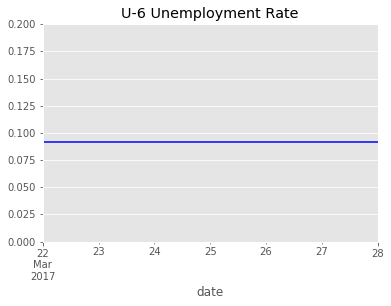

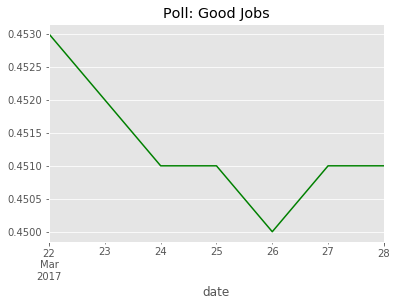

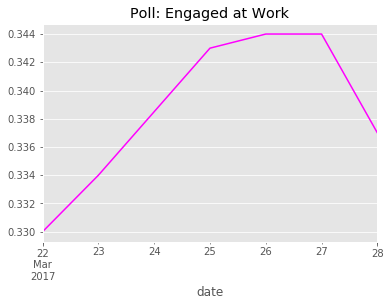

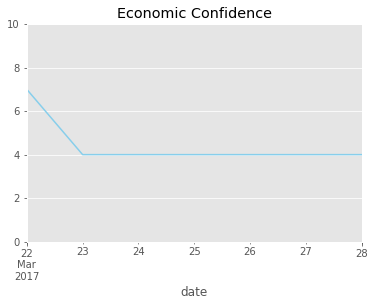

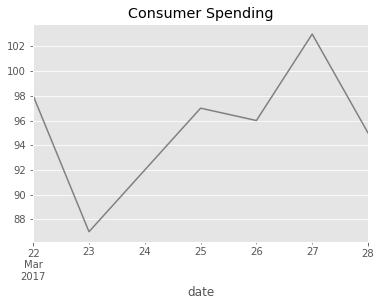

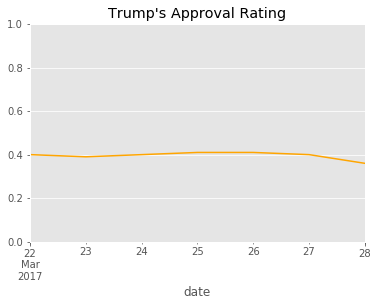

In [51]:
#And here we have the plots!
GallupDF.plot.line(x='date', y='unemployment', color="blue", ylim=(0,0.2), title="U-6 Unemployment Rate", legend=False)
GallupDF.plot.line(x='date', y='goodjobs', color="green", title="Poll: Good Jobs", legend=False)
GallupDF.plot.line(x='date', y='engaged', color="magenta", title="Poll: Engaged at Work", legend=False)
GallupDF.plot.line(x='date', y='econfidence', color="skyblue", ylim=(0,10), title="Economic Confidence", legend=False)
GallupDF.plot.line(x='date', y='consumerspend', color="grey", title="Consumer Spending", legend=False)
GallupDF.plot.line(x='date', y='trumpapprove', color="orange", ylim=(0,1), title="Trump's Approval Rating", legend=False) #Seems like the appropriate color.

At present, these charts aren't particularly interesting. Some hardly reflect any movement at all. But over time they will become a valuable data asset, as we will be able quantify and observe the state of union over long periods of time.

### Slack Bot Attempt
Below is code I began writing to create a slack bot to report the Gallup Daily data. I didn't have time to finish it, but I'll leave it, just in case.

In [38]:
# This part is required to come up with the pop-up with which Slack will ask for permissions
# Remember to have the Flask webserver up and running (WebServer_Receive_Slack_Authentication.py)
# to receive the code.
#from IPython.display import display
#from IPython.display import Javascript as JS

#slack_url = "https://slack.com/oauth/authorize"
#client_id = '132047100118.157644472416'

# remember, the Flask server needs to run
# also, the URL below needs to point to your own server
#redirect_uri = 'http://ec2-52-87-159-211.compute-1.amazonaws.com:5001/slack' 
#permissions = 'client'

# Send an OAuth request to Slack, handle the redirect, and display the access
# token that's included in the redirect for the user to copy and paste
#url = (slack_url + 
    #'?response_type=code' + 
    #'&client_id='+ client_id + 
    #'&scope=' + permissions +
    #'&redirect_uri=' + redirect_uri )

# The code below is necessary to pop up the login window
#display(JS("window.open('%s')" % url))